In [1]:
import torch
from torch.autograd import Variable
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
dtype = torch.FloatTensor

In [3]:
data = pd.read_csv('trafficproject_jin.csv', delimiter=',')

In [4]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size = 0.2)

In [5]:
x1_train_data = train_data.loc[:,'light_num']
x2_train_data = train_data.loc[:,'crossway_num']
x3_train_data = train_data.loc[:,'center']
x4_train_data = train_data.loc[:,'lanes']
x5_train_data = train_data.loc[:,'max_spd']
x6_train_data = train_data.loc[:,'road_length']
x7_train_data = train_data.loc[:,'road_bt']
x8_train_data = train_data.loc[:,'school_num']
x9_train_data = train_data.loc[:,'stations']
x10_train_data = train_data.loc[:,'police_num']
y_train_data = train_data.loc[:,'label']

In [6]:
x1_test_data = test_data.loc[:,'light_num']
x2_test_data = test_data.loc[:,'crossway_num']
x3_test_data = test_data.loc[:,'center']
x4_test_data = test_data.loc[:,'lanes']
x5_test_data = test_data.loc[:,'max_spd']
x6_test_data = test_data.loc[:,'road_length']
x7_test_data = test_data.loc[:,'road_bt']
x8_test_data = test_data.loc[:,'school_num']
x9_test_data = test_data.loc[:,'stations']
x10_test_data = test_data.loc[:,'police_num']
y_test_data = test_data.loc[:,'label']

In [7]:
y = Variable(torch.Tensor(y_train_data.values).type(dtype),requires_grad=False)
x1 = Variable(torch.Tensor(x1_train_data.values).type(dtype),requires_grad=False)
x2 = Variable(torch.Tensor(x2_train_data.values).type(dtype),requires_grad=False)
x3 = Variable(torch.Tensor(x3_train_data.values).type(dtype),requires_grad=False)
x4 = Variable(torch.Tensor(x4_train_data.values).type(dtype),requires_grad=False)
x5 = Variable(torch.Tensor(x5_train_data.values).type(dtype),requires_grad=False)
x6 = Variable(torch.Tensor(x6_train_data.values).type(dtype),requires_grad=False)
x7 = Variable(torch.Tensor(x7_train_data.values).type(dtype),requires_grad=False)
x8 = Variable(torch.Tensor(x8_train_data.values).type(dtype),requires_grad=False)
x9 = Variable(torch.Tensor(x9_train_data.values).type(dtype),requires_grad=False)
x10 = Variable(torch.Tensor(x10_train_data.values).type(dtype),requires_grad=False)

In [8]:
y = Variable(torch.Tensor(y_test_data.values).type(dtype),requires_grad=False)
x1 = Variable(torch.Tensor(x1_test_data.values).type(dtype),requires_grad=False)
x2 = Variable(torch.Tensor(x2_test_data.values).type(dtype),requires_grad=False)
x3 = Variable(torch.Tensor(x3_test_data.values).type(dtype),requires_grad=False)
x4 = Variable(torch.Tensor(x4_test_data.values).type(dtype),requires_grad=False)
x5 = Variable(torch.Tensor(x5_test_data.values).type(dtype),requires_grad=False)
x6 = Variable(torch.Tensor(x6_test_data.values).type(dtype),requires_grad=False)
x7 = Variable(torch.Tensor(x7_test_data.values).type(dtype),requires_grad=False)
x8 = Variable(torch.Tensor(x8_test_data.values).type(dtype),requires_grad=False)
x9 = Variable(torch.Tensor(x9_test_data.values).type(dtype),requires_grad=False)
x10 = Variable(torch.Tensor(x10_test_data.values).type(dtype),requires_grad=False)

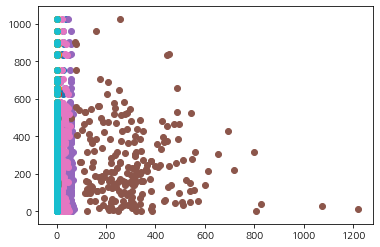

In [9]:
plt.scatter(x1.data.numpy() , y.data.numpy())
plt.scatter(x2.data.numpy() , y.data.numpy())
plt.scatter(x3.data.numpy() , y.data.numpy())
plt.scatter(x4.data.numpy() , y.data.numpy())
plt.scatter(x5.data.numpy() , y.data.numpy())
plt.scatter(x6.data.numpy() , y.data.numpy())
plt.scatter(x7.data.numpy() , y.data.numpy())
plt.scatter(x8.data.numpy() , y.data.numpy())
plt.scatter(x9.data.numpy() , y.data.numpy())
plt.scatter(x10.data.numpy() , y.data.numpy())

In [10]:
w1 = Variable(torch.zeros(1).type(dtype), requires_grad=True) 
w2 = Variable(torch.zeros(1).type(dtype), requires_grad=True) 
w3 = Variable(torch.zeros(1).type(dtype), requires_grad=True)
w4 = Variable(torch.zeros(1).type(dtype), requires_grad=True) 
w5 = Variable(torch.zeros(1).type(dtype), requires_grad=True) 
w6 = Variable(torch.zeros(1).type(dtype), requires_grad=True) 
w7 = Variable(torch.zeros(1).type(dtype), requires_grad=True) 
w8 = Variable(torch.zeros(1).type(dtype), requires_grad=True) 
w9 = Variable(torch.zeros(1).type(dtype), requires_grad=True) 
w10 = Variable(torch.zeros(1).type(dtype), requires_grad=True) 
b = Variable(torch.zeros(1).type(dtype), requires_grad=True)

In [11]:
learning_rate = 0.000001
print("excuting")
lst_w1,lst_w2,lst_w3,lst_w4,lst_w5,lst_w6,lst_w7,lst_w8,lst_w9,lst_w10,lst_b = w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,b

excuting


In [12]:
for itr in range(1000000):
    pred_y = x1.mul(w1).add(x2.mul(w2)).add(x3.mul(w3)).add(x4.mul(w4)).add(x5.mul(w5)).add(x6.mul(w6)).add(x7.mul(w7)).add(x8.mul(w8)).add(x9.mul(w9)).add(x10.mul(w10)).add(b)  
    loss = (y - pred_y).pow(2).mean()  # Mean squared error
    
    if(itr % 1000==0):
        print('itr {}, loss {}'.format(itr, loss.item())) 
        
    loss.backward()  
    w1.data -= learning_rate * w1.grad.item()  
    w2.data -= learning_rate * w2.grad.item()  
    w3.data -= learning_rate * w3.grad.item()  
    w4.data -= learning_rate * w4.grad.item()
    w5.data -= learning_rate * w5.grad.item()
    w6.data -= learning_rate * w6.grad.item()
    w7.data -= learning_rate * w7.grad.item()
    w8.data -= learning_rate * w8.grad.item()
    w9.data -= learning_rate * w9.grad.item()
    w10.data -= learning_rate * w10.grad.item()
    b.data -= learning_rate * b.grad.item() 
    w1.grad.data.zero_()  
    w2.grad.data.zero_()  
    w3.grad.data.zero_()
    w4.grad.data.zero_()
    w5.grad.data.zero_()
    w6.grad.data.zero_()
    w7.grad.data.zero_()
    w8.grad.data.zero_()
    w9.grad.data.zero_()
    w10.grad.data.zero_()
    b.grad.data.zero_()
    lst_w1,lst_w2,lst_w3,lst_w4,lst_w5,lst_w6,lst_w7,lst_w8,lst_w9,lst_w10,lst_b = w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,b

itr 0, loss 111651.984375
itr 1000, loss 32478.6171875
itr 2000, loss 29254.521484375
itr 3000, loss 27549.13671875
itr 4000, loss 26298.701171875
itr 5000, loss 25365.1640625
itr 6000, loss 24667.330078125
itr 7000, loss 24145.318359375
itr 8000, loss 23754.490234375
itr 9000, loss 23461.564453125
itr 10000, loss 23241.703125
itr 11000, loss 23076.357421875
itr 12000, loss 22951.705078125
itr 13000, loss 22857.421875
itr 14000, loss 22785.8125
itr 15000, loss 22731.11328125
itr 16000, loss 22689.0546875
itr 17000, loss 22656.435546875
itr 18000, loss 22630.84765625
itr 19000, loss 22610.515625
itr 20000, loss 22594.125
itr 21000, loss 22580.662109375
itr 22000, loss 22569.3828125
itr 23000, loss 22559.751953125
itr 24000, loss 22551.345703125
itr 25000, loss 22543.861328125
itr 26000, loss 22537.0546875
itr 27000, loss 22530.76953125
itr 28000, loss 22524.861328125
itr 29000, loss 22519.251953125
itr 30000, loss 22513.86328125
itr 31000, loss 22508.63671875
itr 32000, loss 22503.52539

itr 259000, loss 21586.54296875
itr 260000, loss 21583.10546875
itr 261000, loss 21579.669921875
itr 262000, loss 21576.23828125
itr 263000, loss 21572.80859375
itr 264000, loss 21569.376953125
itr 265000, loss 21565.953125
itr 266000, loss 21562.529296875
itr 267000, loss 21559.1171875
itr 268000, loss 21555.716796875
itr 269000, loss 21552.318359375
itr 270000, loss 21548.91796875
itr 271000, loss 21545.55078125
itr 272000, loss 21542.203125
itr 273000, loss 21538.869140625
itr 274000, loss 21535.529296875
itr 275000, loss 21532.19140625
itr 276000, loss 21528.859375
itr 277000, loss 21525.533203125
itr 278000, loss 21522.197265625
itr 279000, loss 21518.869140625
itr 280000, loss 21515.541015625
itr 281000, loss 21512.220703125
itr 282000, loss 21508.91015625
itr 283000, loss 21505.59765625
itr 284000, loss 21502.287109375
itr 285000, loss 21498.9765625
itr 286000, loss 21495.67578125
itr 287000, loss 21492.369140625
itr 288000, loss 21489.07421875
itr 289000, loss 21485.77734375
it

itr 513000, loss 20842.392578125
itr 514000, loss 20839.88671875
itr 515000, loss 20837.392578125
itr 516000, loss 20834.892578125
itr 517000, loss 20832.39453125
itr 518000, loss 20829.892578125
itr 519000, loss 20827.396484375
itr 520000, loss 20824.908203125
itr 521000, loss 20822.4140625
itr 522000, loss 20819.921875
itr 523000, loss 20817.431640625
itr 524000, loss 20814.943359375
itr 525000, loss 20812.4609375
itr 526000, loss 20809.984375
itr 527000, loss 20807.5
itr 528000, loss 20805.015625
itr 529000, loss 20802.533203125
itr 530000, loss 20800.064453125
itr 531000, loss 20797.591796875
itr 532000, loss 20795.1171875
itr 533000, loss 20792.6484375
itr 534000, loss 20790.193359375
itr 535000, loss 20787.73046875
itr 536000, loss 20785.265625
itr 537000, loss 20782.80859375
itr 538000, loss 20780.35546875
itr 539000, loss 20777.892578125
itr 540000, loss 20775.435546875
itr 541000, loss 20772.990234375
itr 542000, loss 20770.533203125
itr 543000, loss 20768.080078125
itr 544000

itr 769000, loss 20289.77734375
itr 770000, loss 20287.8828125
itr 771000, loss 20286.00390625
itr 772000, loss 20284.119140625
itr 773000, loss 20282.23828125
itr 774000, loss 20280.357421875
itr 775000, loss 20278.482421875
itr 776000, loss 20276.599609375
itr 777000, loss 20274.73046875
itr 778000, loss 20272.845703125
itr 779000, loss 20270.974609375
itr 780000, loss 20269.09765625
itr 781000, loss 20267.228515625
itr 782000, loss 20265.3515625
itr 783000, loss 20263.478515625
itr 784000, loss 20261.61328125
itr 785000, loss 20259.74609375
itr 786000, loss 20257.875
itr 787000, loss 20256.009765625
itr 788000, loss 20254.150390625
itr 789000, loss 20252.28515625
itr 790000, loss 20250.423828125
itr 791000, loss 20248.572265625
itr 792000, loss 20246.712890625
itr 793000, loss 20244.85546875
itr 794000, loss 20243.0
itr 795000, loss 20241.14453125
itr 796000, loss 20239.29296875
itr 797000, loss 20237.435546875
itr 798000, loss 20235.58203125
itr 799000, loss 20233.734375
itr 800000

In [13]:
print(w1)
print(w2)
print(w3)
print(w4)
print(w5)
print(w6)
print(w7)
print(w8)
print(w9)
print(w10)

print(b)

tensor([13.1533], requires_grad=True)
tensor([1.8300], requires_grad=True)
tensor([6.6747], requires_grad=True)
tensor([44.8612], requires_grad=True)
tensor([-1.0604], requires_grad=True)
tensor([-0.1171], requires_grad=True)
tensor([1.8786], requires_grad=True)
tensor([-10.4010], requires_grad=True)
tensor([-3.4637], requires_grad=True)
tensor([21.6263], requires_grad=True)
tensor([-3.2648], requires_grad=True)


In [14]:
result = x1.mul(lst_w1).add(x2.mul(lst_w2)).add(x3.mul(lst_w3)).add(x4.mul(lst_w4)).add(x5.mul(lst_w5)).add(x6.mul(lst_w6)).add(x7.mul(lst_w7)).add(x8.mul(lst_w8)).add(x9.mul(lst_w9)).add(x10.mul(lst_w10)).add(lst_b)  

print(result)


tensor([165.8195, 202.7184, 122.9600, 623.8226, 234.6012, 176.0390, 209.8101,
        336.1055, 168.7943,  59.8685, 213.9593, 192.9474,  57.6422, 299.0822,
        242.6308, 518.3740, 459.0418, 263.4232, 492.0140, 242.2305, 213.6330,
        171.5554, 250.9295, 331.5615, 294.6304, 406.2253, 270.5677, 280.5795,
        151.4824, 271.4335, 357.9746, 339.6335, 272.6223,  84.8867, 248.1600,
        220.4185, 169.1561,  97.1569, 587.9469, 124.5962, 215.6688, 129.1545,
        -58.5895, 213.1916, 579.0007, 123.4549, 367.3486,  87.7726, 134.6187,
        419.3281, 202.8024, 527.0333, 275.0953,  74.2194, 404.2106, 208.9886,
        200.9129, 501.0656, 205.5554, 301.4444, 227.1359, 153.2224, 331.1878,
        458.2459, 174.4675, 510.3094, 350.3109, 222.1187, 554.0663,  87.9634,
         85.2883, 115.6243, 518.6760, 326.6394, 291.6857, 220.1155, 321.8881,
        486.1986, 467.7992, 550.8638, 380.6297, 127.2582, 125.5333, 499.2912,
        303.1350, 258.2518,  87.8883, 218.5516, 297.8873, 288.50

In [15]:
result=result.reshape(217,1) 
print(result)

tensor([[165.8195],
        [202.7184],
        [122.9600],
        [623.8226],
        [234.6012],
        [176.0390],
        [209.8101],
        [336.1055],
        [168.7943],
        [ 59.8685],
        [213.9593],
        [192.9474],
        [ 57.6422],
        [299.0822],
        [242.6308],
        [518.3740],
        [459.0418],
        [263.4232],
        [492.0140],
        [242.2305],
        [213.6330],
        [171.5554],
        [250.9295],
        [331.5615],
        [294.6304],
        [406.2253],
        [270.5677],
        [280.5795],
        [151.4824],
        [271.4335],
        [357.9746],
        [339.6335],
        [272.6223],
        [ 84.8867],
        [248.1600],
        [220.4185],
        [169.1561],
        [ 97.1569],
        [587.9469],
        [124.5962],
        [215.6688],
        [129.1545],
        [-58.5895],
        [213.1916],
        [579.0007],
        [123.4549],
        [367.3486],
        [ 87.7726],
        [134.6187],
        [419.3281],


In [16]:
pred_y = pred_y.reshape(217,1) 
print(result - pred_y) 

tensor([[ 1.5259e-05],
        [-4.5776e-05],
        [ 0.0000e+00],
        [ 6.1035e-05],
        [ 0.0000e+00],
        [-1.5259e-05],
        [ 1.5259e-05],
        [ 9.1553e-05],
        [-3.0518e-05],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 1.5259e-05],
        [-1.9073e-05],
        [ 3.0518e-05],
        [-1.5259e-05],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 3.0518e-05],
        [ 3.0518e-05],
        [ 1.5259e-05],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 6.1035e-05],
        [ 9.1553e-05],
        [ 3.0518e-05],
        [ 0.0000e+00],
        [ 6.1035e-05],
        [ 0.0000e+00],
        [ 1.5259e-05],
        [ 6.1035e-05],
        [ 6.1035e-05],
        [ 6.1035e-05],
        [ 3.0518e-05],
        [ 7.6294e-06],
        [ 1.5259e-05],
        [ 4.5776e-05],
        [ 1.5259e-05],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [-1.5259e-05],
        [ 1.5259e-05],
        [ 1.5259e-05],
        [ 0.0000e+00],
        [-1